In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from plotnine import *

In [2]:
df = pd.read_csv("tips.csv")

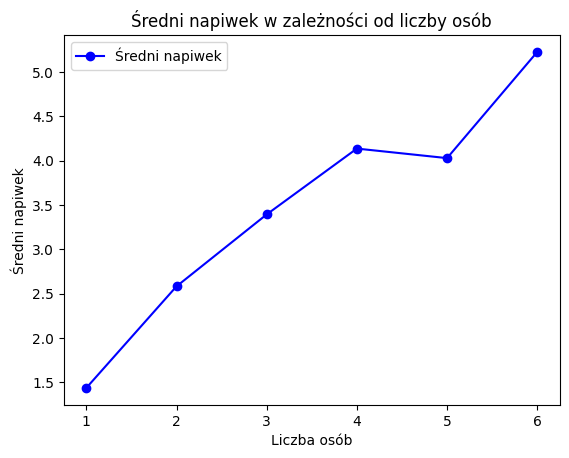

In [9]:
avg_tip = df.groupby("size")["tip"].mean().reset_index()
plt.plot(avg_tip["size"], avg_tip["tip"], marker='o', linestyle='-', color='b', label="Średni napiwek")
plt.xlabel("Liczba osób")
plt.ylabel("Średni napiwek")
plt.title("Średni napiwek w zależności od liczby osób")
plt.legend()
plt.show()

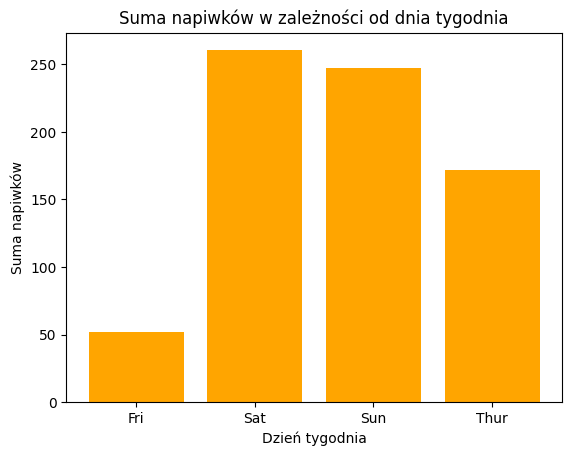

In [10]:
total_tip = df.groupby("day")["tip"].sum().reset_index()
plt.bar(total_tip["day"], total_tip["tip"], color='orange')
plt.xlabel("Dzień tygodnia")
plt.ylabel("Suma napiwków")
plt.title("Suma napiwków w zależności od dnia tygodnia")
plt.show()

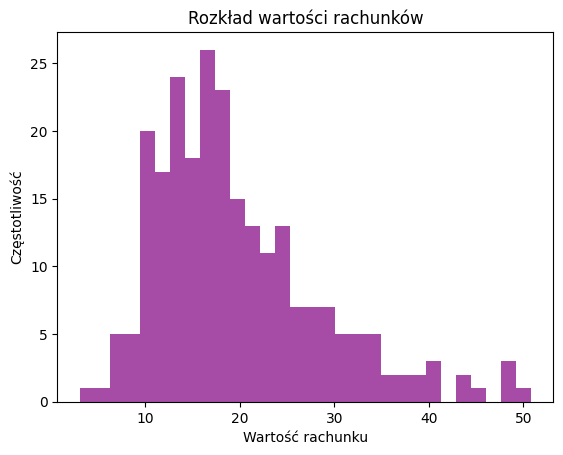

In [11]:
plt.hist(df["total_bill"], bins=30, color='purple', alpha=0.7)
plt.xlabel("Wartość rachunku")
plt.ylabel("Częstotliwość")
plt.title("Rozkład wartości rachunków")
plt.show()

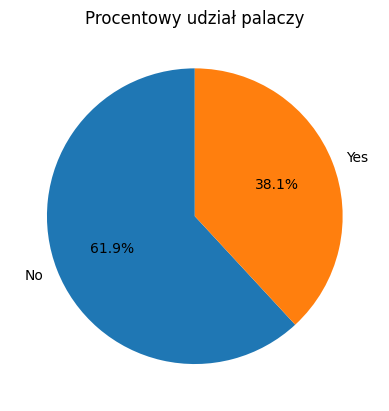

In [12]:
smoker_counts = df["smoker"].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Procentowy udział palaczy")
plt.show()

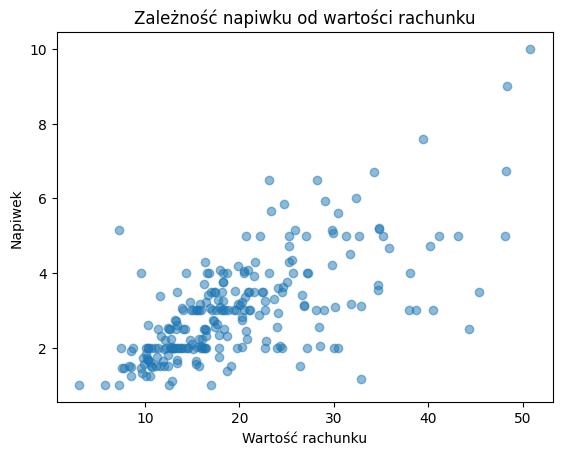

In [13]:
plt.scatter(df["total_bill"], df["tip"], alpha=0.5)
plt.xlabel("Wartość rachunku")
plt.ylabel("Napiwek")
plt.title("Zależność napiwku od wartości rachunku")
plt.show()

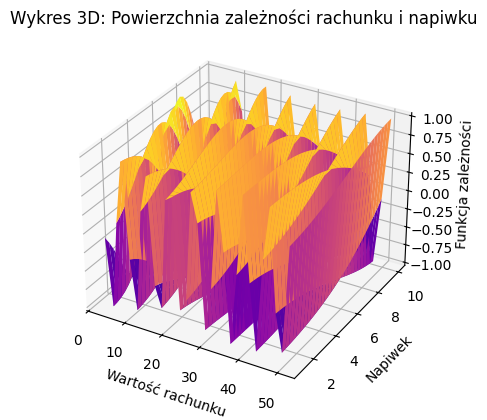

In [15]:
x = np.linspace(df["total_bill"].min(), df["total_bill"].max(), 30)
y = np.linspace(df["tip"].min(), df["tip"].max(), 30)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_xlabel("Wartość rachunku")
ax.set_ylabel("Napiwek")
ax.set_zlabel("Funkcja zależności")
ax.set_title("Wykres 3D: Zależności rachunku i napiwku")
plt.show()

In [24]:
df["total_bill_bin"] = pd.cut(df["total_bill"], bins=10).astype(str)
avg_tip_per_bin = df.groupby("total_bill_bin")["tip"].mean().reset_index()

fig = px.line(avg_tip_per_bin, x="total_bill_bin", y="tip", title="Średni napiwek w zależności od wartości rachunku")
fig.show()



In [21]:
fig = px.bar(df.groupby("day", as_index=False).sum(), x="day", y="tip", title="Suma napiwków w zależności od dnia tygodnia")
fig.show()

In [19]:
fig = px.pie(df, names="smoker", title="Procentowy udział palaczy")
fig.show()

In [20]:
fig = px.histogram(df, x="total_bill", nbins=30, title="Rozkład wartości rachunków")
fig.show()

In [26]:
df["total_bill_bin"] = pd.cut(df["total_bill"], bins=10).astype(str)
avg_tip_per_bin = df.groupby("total_bill_bin")["tip"].mean().reset_index()
fig = px.line(avg_tip_per_bin, x="total_bill_bin", y="tip", title="Średni napiwek w zależności od wartości rachunku")
fig.update_traces(line=dict(color="purple", width=4))
fig.show()


In [27]:
fig = px.line(avg_tip_per_bin, x="total_bill_bin", y="tip", title="Średni napiwek w zależności od wartości rachunku")

fig.update_traces(line=dict(color="purple", width=4))

fig.add_annotation(x=avg_tip_per_bin["total_bill_bin"].iloc[len(avg_tip_per_bin)//2],
                   y=avg_tip_per_bin["tip"].max(),
                   text="Najwyższy średni napiwek",
                   showarrow=True,
                   arrowhead=1)

fig.show()


In [28]:
fig = px.scatter(df, x="total_bill", y="tip", color="sex", size="size",
                 title="Zależność napiwku od wartości rachunku")
fig.show()

In [29]:
import plotly.graph_objects as go
import numpy as np

x = np.linspace(df["total_bill"].min(), df["total_bill"].max(), 30)
y = np.linspace(df["tip"].min(), df["tip"].max(), 30)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='plasma')])
fig.update_layout(title="Interaktywny wykres 3D: Powierzchnia zależności rachunku i napiwku",
                  scene=dict(xaxis_title="Wartość rachunku",
                             yaxis_title="Napiwek",
                             zaxis_title="Funkcja zależności"))
fig.show()


In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Wykres Punktowy", "Wykres Słupkowy"))

fig.add_trace(go.Scatter(x=df["total_bill"], y=df["tip"], mode="markers", name="Punkty"),
              row=1, col=1)

total_tip = df.groupby("day")["tip"].sum().reset_index()
fig.add_trace(go.Bar(x=total_tip["day"], y=total_tip["tip"], name="Słupkowy"),
              row=1, col=2)

fig.update_layout(title_text="Subploty w Plotly")
fig.show()



In [32]:
#! pip install plotnine

In [33]:
from plotnine import ggplot, aes, geom_point, geom_line, geom_bar, geom_histogram, labs

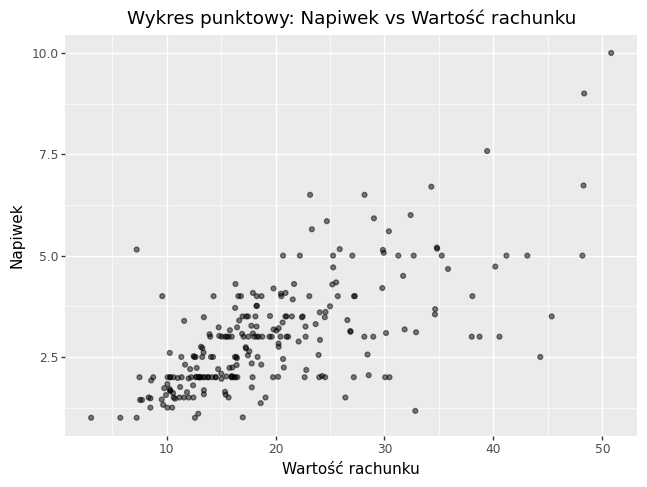

In [37]:
scatter_plot = (
    ggplot(df, aes(x='total_bill', y='tip')) +
    geom_point(alpha=0.5) +
    labs(title='Wykres punktowy: Napiwek vs Wartość rachunku', x='Wartość rachunku', y='Napiwek')
)
scatter_plot.draw()

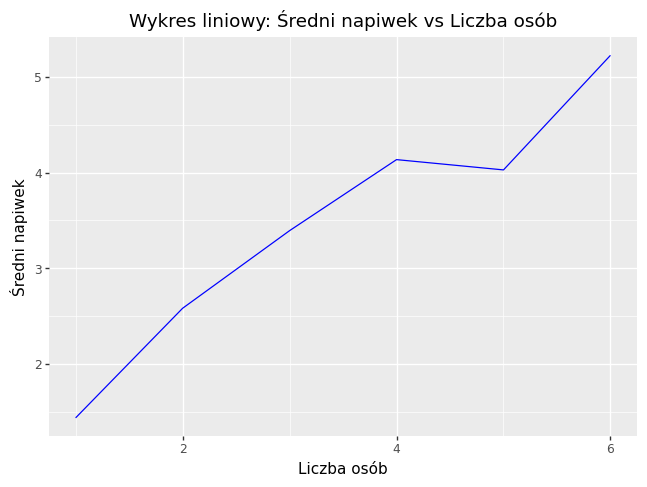

In [36]:
avg_tip = df.groupby("size")["tip"].mean().reset_index()
line_plot = (
    ggplot(avg_tip, aes(x='size', y='tip')) +
    geom_line(color="blue") +
    labs(title='Wykres liniowy: Średni napiwek vs Liczba osób', x='Liczba osób', y='Średni napiwek')
)
line_plot.draw()

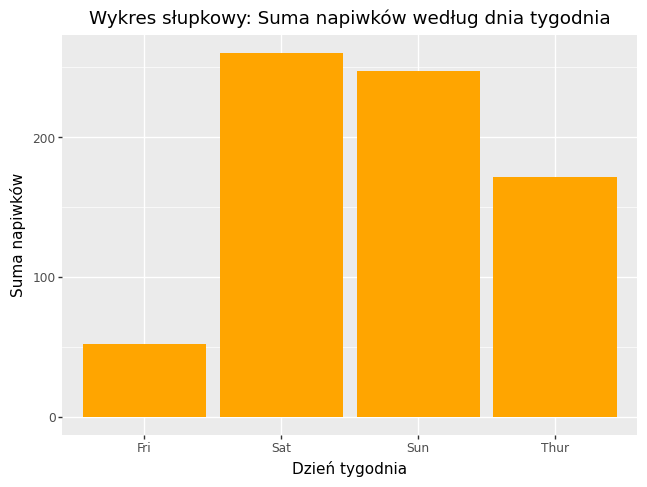

In [38]:
total_tip = df.groupby("day")["tip"].sum().reset_index()
bar_plot = (
    ggplot(total_tip, aes(x='day', y='tip')) +
    geom_bar(stat='identity', fill='orange') +
    labs(title='Wykres słupkowy: Suma napiwków według dnia tygodnia', x='Dzień tygodnia', y='Suma napiwków')
)
bar_plot.draw()

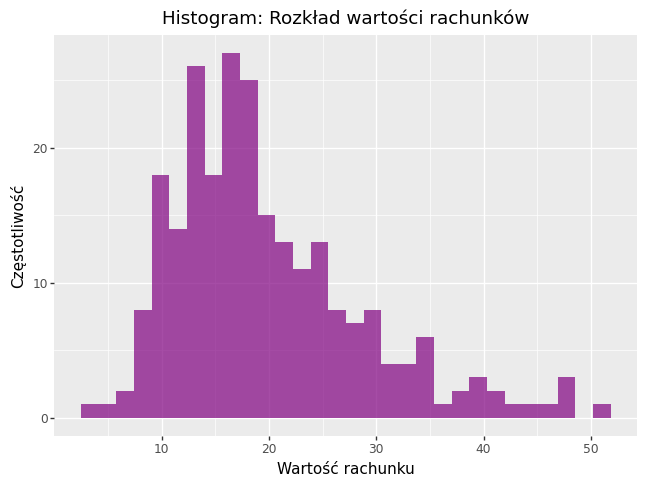

In [39]:
histogram_plot = (
    ggplot(df, aes(x='total_bill')) +
    geom_histogram(bins=30, fill='purple', alpha=0.7) +
    labs(title='Histogram: Rozkład wartości rachunków', x='Wartość rachunku', y='Częstotliwość')
)
histogram_plot.draw()

In [40]:
from plotnine import ggplot, aes, geom_point, geom_boxplot, facet_wrap, theme_minimal, labs

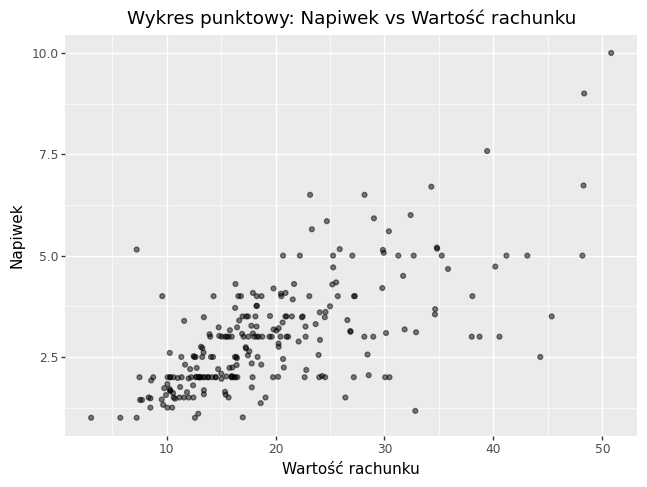

In [41]:
scatter_facet = (
    ggplot(df, aes(x='total_bill', y='tip')) +
    geom_point(alpha=0.5) +
    facet_wrap('~sex') +
    labs(title='Wykres punktowy: Napiwek vs Wartość rachunku (facetowanie według płci)', x='Wartość rachunku', y='Napiwek')
)
scatter_plot.draw()

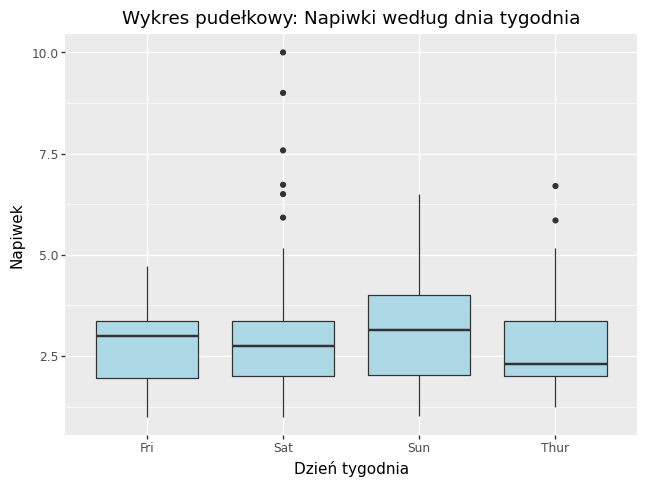

In [42]:
box_plot = (
    ggplot(df, aes(x='day', y='tip')) +
    geom_boxplot(fill='lightblue') +
    labs(title='Wykres pudełkowy: Napiwki według dnia tygodnia', x='Dzień tygodnia', y='Napiwek')
)
box_plot.draw()

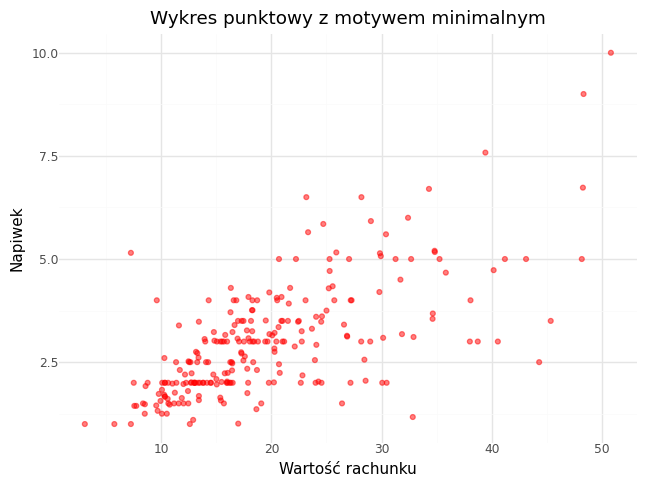

In [43]:
scatter_with_theme = (
    ggplot(df, aes(x='total_bill', y='tip')) +
    geom_point(alpha=0.5, color="red") +
    theme_minimal() +
    labs(title='Wykres punktowy z motywem minimalnym', x='Wartość rachunku', y='Napiwek')
)
scatter_with_theme.draw()

In [45]:
import plotly.express as px

df = px.data.carshare()

fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon", hover_name="peak_hour",
                        zoom=10, height=500, size="car_hours")

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(title="Lokalizacja stacji carsharingu")
fig.show()


In [51]:
import plotly.express as px

data = px.data.gapminder().query("year == 2007")
fig = px.choropleth(data,
                    locations="iso_alpha",
                    color="gdpPercap",
                    hover_name="country",
                    color_continuous_scale="Blues",
                    labels={'gdpPercap': 'PKB na mieszkańca'})

fig.update_layout(title="PKB na mieszkańca w 2007 roku")
fig.show()



In [54]:
import plotly.graph_objects as go
import plotly.express as px

df = px.data.carshare()

fig = go.Figure(go.Densitymapbox(
    lat=df["centroid_lat"],
    lon=df["centroid_lon"],
    z=df["car_hours"],
    radius=25,
    colorscale="Viridis",
    opacity=0.6))

fig.update_layout(mapbox_style="open-street-map",
                  mapbox_center={"lat": df["centroid_lat"].mean(), "lon": df["centroid_lon"].mean()},
                  mapbox_zoom=10)

fig.update_layout(title="Mapa Cieplna Gęstości Wypożyczeń Samochodów")
fig.show()
